## MNIST Tensorflow

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.examples.tutorials.mnist import input_data

In [15]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [16]:
mnist.train.images.shape , mnist.train.labels.shape  ##train data images 28 x 28

((55000, 784), (55000, 10))

In [44]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
mnist.test.images.shape

(10000, 784)

In [19]:
mnist.validation.images.shape

(5000, 784)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

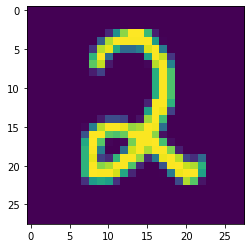

In [23]:
first_image = mnist.train.images[890]
first_image = np.array(first_image, dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [26]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [81]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(10,) dtype=float32_ref>]

In [47]:
def forward_propogation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [93]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float',[None, n_input])
y = tf.placeholder(tf.int32,[None, n_classes])
pred = forward_propogation(x, weights, biases)

In [94]:
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [95]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [96]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01 )
optimize = optimizer.minimize(cost)

In [97]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [91]:
for i in range(25):
    c, _ = sess.run([cost, optimize], feed_dict={x:mnist.train.images, y:mnist.train.labels})

In [98]:
#Bacth Gradient descent
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimize], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

21391.119641900063
4428.818537671207
2398.296501472036
1577.5270491630502
1352.9232175634963
1013.2878438672234
922.18553231715
834.3977737685602
819.3658259287283
633.3284780291084
537.5170310465624
489.2344473938167
441.81431049347805
391.7662968804818
353.8219750294183
375.3268815580715
292.40671550856007
247.63660426876783
239.06870601557952
179.62310146985428
168.26097163710256
151.02054664785953
129.66424288271958
151.0352538043595
123.02884961742893


In [99]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions, correct_predictions = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images, y:mnist.test.labels})
correct_predictions.sum()

9532